In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from Erwin.datasets.utils import iterators
from Erwin.datasets import Dataset

In [11]:
y_pred = tf.placeholder(shape=(3,4), dtype=tf.float32)
y_true = tf.placeholder(shape=(3,4), dtype=tf.float32)
weights = tf.placeholder(shape=(3,4), dtype=tf.int32)
acc, acc_update = tf.contrib.metrics.streaming_accuracy(y_true, y_pred, weights)

In [12]:
#y_pred_numpy = np.asarray([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
#y_true_numpy = np.asarray([[0, 0, 1], [1, 0, 1]], dtype=np.float32)
#weights_numpy = np.asarray([[1, 1, 1], [1, 1, 0]], dtype=np.int32)
y_pred_numpy = np.random.randint(0, 2, size=(10, 3, 4)).astype(np.float32)
y_true_numpy = np.random.randint(0, 2, size=(10, 3, 4)).astype(np.float32)
weights_numpy = np.random.binomial(2, p=0.1, size=(10, 3, 4))
y_pred_numpy.shape, weights_numpy.shape

((10, 3, 4), (10, 3, 4))

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [14]:
for y_p, y_t, w in zip(y_pred_numpy, y_true_numpy, weights_numpy[:, :, :]):
    res = sess.run([acc_update], feed_dict={y_pred: y_p, y_true: y_t, weights: w})
    print(res)

[0.0]
[0.0]
[0.2]
[0.33333334]
[0.5]
[0.45454547]
[0.5]
[0.53333336]
[0.57894737]
[0.60000002]


In [15]:
import os
import json
import numpy as np

In [17]:
csv_file = '/home/huizhu/bitbucket/mol_data/dude/logs/model_mlp/logger_01.csv'
df = pd.read_csv(csv_file)
df.shape

(2100, 10)

In [19]:
train_df = df.loc[df.dataset=='train']
valid_df = df.loc[df.dataset=='valid']

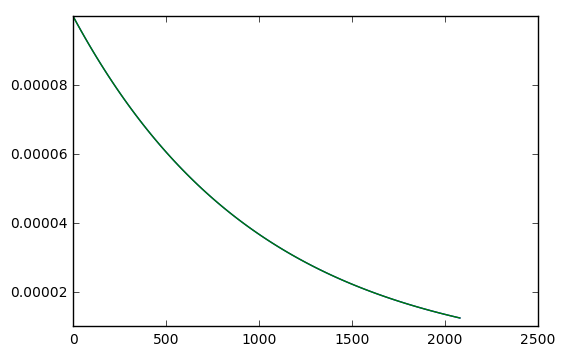

In [21]:
plt.plot(valid_df.lr)
plt.show()

### unbiased variance
* suppose we want to estimate the *mean* and *variance* of variable $x$ according to the observed samples $\{x_1, x_2, ..., x_N\}$. If we have enough samples, i.e $N \rightarrow \infty$, thus

$$
\begin{array}{lll}
\mu &= & \lim_{N \rightarrow \infty}\frac{1}{N}\sum_{i} x_i \\
\sigma^2 &= & \lim_{N \rightarrow \infty}\frac{1}{N}\sum_{i}(x_i - \mu)^2
\end{array}
$$

So, $\hat{\mu} =  \frac{1}{N}\sum_{i} x_i$ approxiates $\mu$; but 
$$\hat{\sigma}^2 =  \frac{1}{N}\sum_{i}(x_i - \hat{\mu})^2$$ could be further reformulated as following

$$
\begin{array}{lll}
\hat{\sigma}^2 &= & \frac{1}{N}\sum_{i}(x_i - \hat{\mu})^2 \\
& = & (\frac{N-1}{N})^2 \frac{1}{N} \sum_{i} (x_i - \hat{\mu}_i)^2  \\
& = & (\frac{N-1}{N})^2 \bar{\sigma}^2
\end{array}
$$
where $\hat{\mu}_i \equiv \frac{1}{N-1}\sum_{j\neq i} x_j$

In the above, we can see that $\bar{\sigma}^2$
will be much closer to $\sigma^2$ than $\hat{\sigma}^2$

In [11]:
import tensorflow as tf
from keras.layers import Conv2D
from keras.models import Sequential

In [12]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), input_shape=(3, 128, 128), data_format='channels_first'))
model.input_shape, model.output_shape

((None, 3, 128, 128), (None, 64, 124, 124))

In [13]:
model.weights

[<tf.Variable 'conv2d_3/kernel:0' shape=(5, 5, 3, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_3/bias:0' shape=(64,) dtype=float32_ref>]

In [14]:
model.layers[-1].kernel_size

(5, 5)

In [3]:
axis = 1
input_shape = model.input_shape[:]
ndim = len(input_shape)
reduction_axes = list(range(len(input_shape)))
del reduction_axes[axis]
broadcast_shape = [1] * len(input_shape)
broadcast_shape[axis] = input_shape[axis]
sorted(reduction_axes), list(range(ndim))[:-1]
#needs_broadcasting = (sorted(reduction_axes) != list(range(ndim))[:-1])

([0, 2, 3], [0, 1, 2])

In [5]:
x = tf.placeholder(shape=(input_shape[axis],), dtype=tf.float32)
tf.reshape(x, broadcast_shape)

<tf.Tensor 'Reshape:0' shape=(1, 3, 1, 1) dtype=float32>

In [6]:
help(tf.nn.batch_normalization)

Help on function batch_normalization in module tensorflow.python.ops.nn_impl:

batch_normalization(x, mean, variance, offset, scale, variance_epsilon, name=None)
    Batch normalization.
    
    As described in http://arxiv.org/abs/1502.03167.
    Normalizes a tensor by `mean` and `variance`, and applies (optionally) a
    `scale` \\(\gamma\\) to it, as well as an `offset` \\(\beta\\):
    
    \\(\frac{\gamma(x-\mu)}{\sigma}+\beta\\)
    
    `mean`, `variance`, `offset` and `scale` are all expected to be of one of two
    shapes:
    
      * In all generality, they can have the same number of dimensions as the
        input `x`, with identical sizes as `x` for the dimensions that are not
        normalized over (the 'depth' dimension(s)), and dimension 1 for the
        others which are being normalized over.
        `mean` and `variance` in this case would typically be the outputs of
        `tf.nn.moments(..., keep_dims=True)` during training, or running averages
        thereof 

In [7]:
help(tf.nn.moments)

Help on function moments in module tensorflow.python.ops.nn_impl:

moments(x, axes, shift=None, name=None, keep_dims=False)
    Calculate the mean and variance of `x`.
    
    The mean and variance are calculated by aggregating the contents of `x`
    across `axes`.  If `x` is 1-D and `axes = [0]` this is just the mean
    and variance of a vector.
    
    Note: for numerical stability, when shift=None, the true mean
    would be computed and used as shift.
    
    When using these moments for batch normalization (see
    `tf.nn.batch_normalization`):
    
     * for so-called "global normalization", used with convolutional filters with
       shape `[batch, height, width, depth]`, pass `axes=[0, 1, 2]`.
     * for simple batch normalization pass `axes=[0]` (batch only).
    
    Args:
      x: A `Tensor`.
      axes: Array of ints.  Axes along which to compute mean and
        variance.
      shift: A `Tensor` containing the value by which to shift the data for
        numerical st

In [17]:
help(tf.nn.conv2d)

Help on function conv2d in module tensorflow.python.ops.gen_nn_ops:

conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)
    Computes a 2-D convolution given 4-D `input` and `filter` tensors.
    
    Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
    and a filter / kernel tensor of shape
    `[filter_height, filter_width, in_channels, out_channels]`, this op
    performs the following:
    
    1. Flattens the filter to a 2-D matrix with shape
       `[filter_height * filter_width * in_channels, output_channels]`.
    2. Extracts image patches from the input tensor to form a *virtual*
       tensor of shape `[batch, out_height, out_width,
       filter_height * filter_width * in_channels]`.
    3. For each patch, right-multiplies the filter matrix and the image patch
       vector.
    
    In detail, with the default NHWC format,
    
        output[b, i, j, k] =
            sum_{di, dj, q} input[b, strides[1] * i + 